In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_auc_score, f1_score, confusion_matrix, precision_score
import xgboost as xgb

In [ ]:
df = pd.read_csv('datasetWithoutScale.csv')
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi_interaction,cardiovascular_risk_score,gender_Male,...,smoking_status_never smoked,smoking_status_smokes,age_group_Adult,age_group_Middle-Aged,age_group_Senior,bmi_class_Normal,bmi_class_Overweight,bmi_class_Obese,glucose_risk_Prediabetes,glucose_risk_Diabetes
0,0,67.0,0,1,228.69,36.6,1,2452.2,1,True,...,False,False,False,False,True,False,False,True,False,True
1,1,61.0,0,0,202.21,29.1,1,1775.1,0,False,...,True,False,False,False,True,False,True,False,False,True
2,2,80.0,0,1,105.92,32.5,1,2600.0,1,True,...,True,False,False,False,True,False,False,True,False,False
3,3,49.0,0,0,171.23,34.4,1,1685.6,0,False,...,False,True,False,True,False,False,False,True,True,False
4,4,79.0,1,0,174.12,24.0,1,1896.0,1,False,...,True,False,False,False,True,True,False,False,True,False


In [76]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [77]:

if 'Unnamed: 0' in X.columns:
    X = X.drop('Unnamed: 0', axis=1)



In [78]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,age_bmi_interaction,cardiovascular_risk_score,gender_Male,ever_married_Yes,work_type_Never_worked,...,smoking_status_never smoked,smoking_status_smokes,age_group_Adult,age_group_Middle-Aged,age_group_Senior,bmi_class_Normal,bmi_class_Overweight,bmi_class_Obese,glucose_risk_Prediabetes,glucose_risk_Diabetes
0,67.0,0,1,228.69,36.6,2452.2,1,True,True,False,...,False,False,False,False,True,False,False,True,False,True
1,61.0,0,0,202.21,29.1,1775.1,0,False,True,False,...,True,False,False,False,True,False,True,False,False,True
2,80.0,0,1,105.92,32.5,2600.0,1,True,True,False,...,True,False,False,False,True,False,False,True,False,False
3,49.0,0,0,171.23,34.4,1685.6,0,False,True,False,...,False,True,False,True,False,False,False,True,True,False
4,79.0,1,0,174.12,24.0,1896.0,1,False,True,False,...,True,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,80.0,1,0,83.75,29.1,2328.0,1,False,True,False,...,True,False,False,False,True,False,True,False,False,False
5089,81.0,0,0,125.20,40.0,3240.0,0,False,True,False,...,True,False,False,False,True,False,False,True,False,False
5090,35.0,0,0,82.99,30.6,1071.0,0,False,True,False,...,True,False,True,False,False,False,False,True,False,False
5091,51.0,0,0,166.29,25.6,1305.6,0,True,True,False,...,False,False,False,True,False,False,True,False,True,False


In [79]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5088    0
5089    0
5090    0
5091    0
5092    0
Name: stroke, Length: 5093, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,random_state=42, stratify=y)

In [81]:
if 'Unnamed: 0' in X_train.columns:
    X_train = X_train.drop('Unnamed: 0', axis=1)

if 'Unnamed: 0' in X_test.columns:
    X_test = X_test.drop('Unnamed: 0', axis=1)

In [82]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'age_bmi_interaction']
scaler = StandardScaler()


In [83]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [84]:
log_reg = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=42,max_iter=500)

In [85]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [86]:
log_reg.score(X_train,y_train)

0.7209131075110456

In [87]:
log_reg.score(X_test, y_test)
# generate y_predict and compare with y_train and calculate thhe accurcy between thim

0.7124631992149166

In [88]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], shape=(1019,))

In [89]:
accuracy_score(y_test, y_pred) # calculate Correct prediction / Total number

0.7124631992149166

In [90]:
confusion_matrix(y_test, y_pred)
# [TN,FP]
# [FN,TP]

array([[683, 286],
       [  7,  43]])

In [91]:
precision_score(y_test, y_pred) # It calculates the percentage of predictions where the model said 'positive' and they were actually correct.

0.13069908814589665

In [92]:
recall_score(y_test, y_pred) # It calculates the percentage of all true positive cases that the model successfully detected.

0.86

In [93]:
f1_score(y_test, y_pred)
# use it in Imbalanced Data : When the classes in the test data are imbalanced in number of samples

0.22691292875989447

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       969
           1       0.13      0.86      0.23        50

    accuracy                           0.71      1019
   macro avg       0.56      0.78      0.53      1019
weighted avg       0.95      0.71      0.79      1019



In [95]:
import numpy as np


coefficients = log_reg.coef_[0]


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})


feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])


feature_importance = feature_importance.sort_values(
    by='Absolute_Coefficient', 
    ascending=False
)


print("### 🏆  Most important 15 feature impact on (Logistic Regression) ###")
print(feature_importance.head(15))

### 🏆  Most important 15 feature impact on (Logistic Regression) ###
                        Feature  Coefficient  Absolute_Coefficient
0                           age     2.400385              2.400385
12           work_type_children     2.100269              2.100269
21         bmi_class_Overweight     1.423945              1.423945
22              bmi_class_Obese     1.146051              1.146051
20             bmi_class_Normal     1.103552              1.103552
19             age_group_Senior    -0.921735              0.921735
17              age_group_Adult    -0.902252              0.902252
23     glucose_risk_Prediabetes     0.779508              0.779508
24        glucose_risk_Diabetes     0.425248              0.425248
15  smoking_status_never smoked    -0.329484              0.329484
6     cardiovascular_risk_score     0.295301              0.295301
1                  hypertension     0.271827              0.271827
5           age_bmi_interaction    -0.269986              0.

In [96]:
! pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:



scale_pos_weight_value = 4861 / 249


xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',    
    use_label_encoder=False,    
    scale_pos_weight=scale_pos_weight_value, 
    random_state=42,
    n_estimators=100  
)


xgb_model.fit(X_train, y_train)

e:\pythonn\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [98]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [99]:
y_pred_xgb

array([1, 0, 0, ..., 0, 0, 0], shape=(1019,))

In [100]:
y_proba_xgb

array([9.5377320e-01, 4.7971157e-04, 1.1852254e-04, ..., 4.2889721e-04,
       1.2776431e-01, 1.7905760e-03], shape=(1019,), dtype=float32)

In [101]:
print(f"Recall : {recall_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Recall : 0.3200
Precision: 0.2623
F1 Score: 0.2883
ROC AUC Score: 0.8109
Confusion Matrix:
 [[924  45]
 [ 34  16]]


In [102]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       969
           1       0.26      0.32      0.29        50

    accuracy                           0.92      1019
   macro avg       0.61      0.64      0.62      1019
weighted avg       0.93      0.92      0.93      1019



## GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


scale_pos_weight_value = 4861 / 249


param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],  
    'n_estimators': [100, 200, 300]
}


xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)

In [104]:


grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',       
    cv=5,               
    verbose=2,         
    n_jobs=-1          
)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


e:\pythonn\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:37:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [105]:

print("best paramitars", grid_search.best_params_)


best_xgb_model = grid_search.best_estimator_


y_pred_tuned = best_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

best paramitars {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       969
           1       0.16      0.58      0.25        50

    accuracy                           0.83      1019
   macro avg       0.57      0.71      0.58      1019
weighted avg       0.94      0.83      0.87      1019



In [106]:


# import lightgbm as lgb
# from sklearn.metrics import classification_report, confusion_matrix


# model = lgb.LGBMClassifier(
#     is_unbalance=True,          # أو scale_pos_weight=19.55
#     max_depth=6,
#     learning_rate=0.02,
#     n_estimators=800,
#     num_leaves=31,
#     min_child_samples=20,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     random_state=42
# )

# model.fit(X_train, y_train)


# y_proba = model.predict_proba(X_test)[:, 1]
# threshold = 0.28  
# y_pred_adj = (y_proba >= threshold).astype(int)

# print(classification_report(y_test, y_pred_adj))
# print(confusion_matrix(y_test, y_pred_adj))

🥷 أحسن Threshold عشان Recall ≥ 0.92: 0.002
              precision    recall  f1-score   support

           0     0.9925    0.5459    0.7044       969
           1     0.0947    0.9200    0.1716        50

    accuracy                         0.5643      1019
   macro avg     0.5436    0.7330    0.4380      1019
weighted avg     0.9484    0.5643    0.6783      1019

Confusion Matrix:
[[529 440]
 [  4  46]]

ROC-AUC Score: 0.8241
Threshold : 0.002
46  from 50
→  Recall = 92.0%


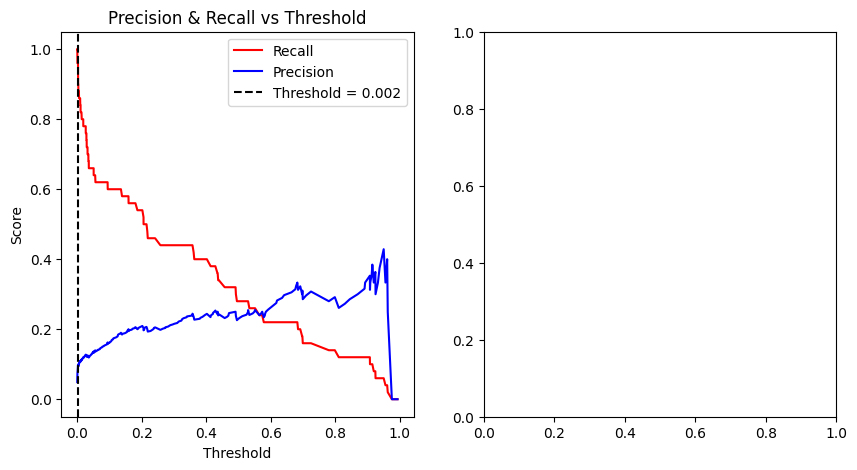

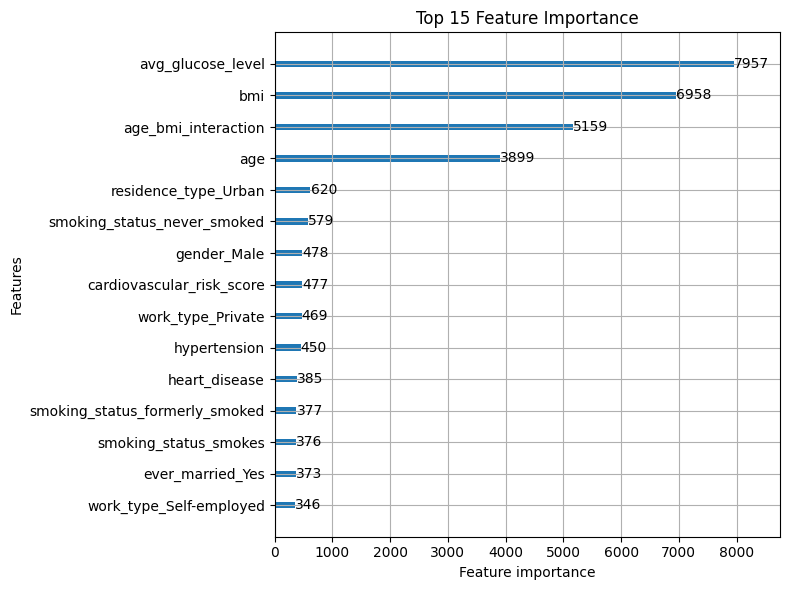

In [107]:


import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np


final_model = lgb.LGBMClassifier(
    is_unbalance=True,           
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=7,
    num_leaves=40,
    min_child_samples=15,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    verbose=-1
)


final_model.fit(X_train, y_train)


y_proba = final_model.predict_proba(X_test)[:, 1]


precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)


target_recall = 0.92
idx = np.where(recalls >= target_recall)[0][-1] 
best_threshold = thresholds[idx]

print(f"🥷 أحسن Threshold عشان Recall ≥ {target_recall}: {best_threshold:.3f}")


y_pred_final = (y_proba >= best_threshold).astype(int)




print("="*60)
print(classification_report(y_test, y_pred_final, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Threshold : {best_threshold:.3f}")
print(f"{confusion_matrix(y_test, y_pred_final)[1,1]}  from 50")
print(f"→  Recall = {confusion_matrix(y_test, y_pred_final)[1,1] / 50:.1%}")


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.axvline(best_threshold, color="black", linestyle="--", label=f"Threshold = {best_threshold:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()

plt.subplot(1,2,2)
lgb.plot_importance(final_model, max_num_features=15, figsize=(8,6))
plt.title("Top 15 Feature Importance")

plt.tight_layout()
plt.show()

In [108]:
import numpy as np

N0 = np.sum(y_train == 0)

N1 = np.sum(y_train == 1)

new_scale_pos_weight = N0 / N1

print(f" (N0): {N0}")
print(f" (N1): {N1}")
print(f" scale_pos_weight: {new_scale_pos_weight:.2f}")

 (N0): 3875
 (N1): 199
 scale_pos_weight: 19.47


In [109]:


import lightgbm as lgb
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve


final_mode = lgb.LGBMClassifier(
    # is_unbalance=True,
    scale_pos_weight=19.47,
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=7,
    num_leaves=45,
    min_child_samples=15,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.3,
    reg_lambda=0.3,
    random_state=42,
    verbose=-1
)

final_mode.fit(X_train, y_train)


y_proba = final_mode.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)


target_recall = 0.80
idx = np.where(recalls >= target_recall)[0]
f1_scores = 2 * (precisions[idx] * recalls[idx]) / (precisions[idx] + recalls[idx] + 1e-10)
best_idx = idx[np.argmax(f1_scores)]
BEST_THRESHOLD = thresholds[best_idx]

print(f"🎯ـ Threshold : {BEST_THRESHOLD:.4f}")
print(f"   → Recall  ≈ {recalls[best_idx]:.3f}")
print(f"   → Precision  ≈ {precisions[best_idx]:.3f}")
print(f"   → F1  ≈ {f1_scores.max():.3f}")


y_pred_final = (y_proba >= BEST_THRESHOLD).astype(int)
print("\n" + "="*55)

print(classification_report(y_test, y_pred_final, digits=4))
print(confusion_matrix(y_test, y_pred_final))


joblib.dump({
    'model': final_mode,
    'scaler': scaler,
    'threshold': BEST_THRESHOLD,
    'numerical_cols': numerical_cols,
    'features': X_train.columns.tolist()
}, 'stroke_prediction_model_final.pkl')



🎯ـ Threshold : 0.0244
   → Recall  ≈ 0.820
   → Precision  ≈ 0.124
   → F1  ≈ 0.215

              precision    recall  f1-score   support

           0     0.9869    0.7007    0.8196       969
           1     0.1239    0.8200    0.2152        50

    accuracy                         0.7066      1019
   macro avg     0.5554    0.7604    0.5174      1019
weighted avg     0.9446    0.7066    0.7899      1019

[[679 290]
 [  9  41]]


['stroke_prediction_model_final.pkl']